
## 2. Eigengesichter
Die Hauptkomponentenanalyse lässt sich auch auf Bilder anwenden, indem man die Bildzeilen in einem einzigen Vektor aneinander hängt (*Stacking*). Die zugehörigen Richtungen extremaler Varianz heißen *Eigengesichter*. Sie eignen sich nicht nur zur Datenkompression, sondern auch zum Aufbau eines einfachen Gesichtserkennungssystems (s. M. Turk and A. Pentland, “Eigenfaces for Recognition”, Journal of Cognitive Neuroscience, vol. 3, no. 1, pp. 71–86, 1991). Für die Funktion eines solchen Systems ist es wichtig, dass die Gesichter zentriert und in derselben Größe abgebildet sind. Ein dafür geeigneter Datensatz ist ''Labeled Faces in the Wild'' der Universität von Massachusetts in Amherst ([http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz](http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz), 233MB) mit Bildern von 13.000 Personen des öffentlichen Lebens aus dem Internet, alle mit Namen gelabelt.

Aufgaben:

## 2.1 Herunterladen des Datensatzes

Laden Sie sich den oben angegebenen Datensatz herunter. Erstellen Sie ein Python- Skript, dass die Verzeichnisse des Datensatzes durchsucht und die Personen ermittelt, für die mindestens 70 Bilder existieren. Die dafür geeigneten Funktionen finden sich im Standardmodul `os` bzw. `os.path`.

### 2.2.1 Herunterladen des Datensatzes wie im vorherigen Schritt beschrieben.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

print(f"pandas version: {pd.__version__}\nnumpy version: {np.__version__}")

pandas version: 2.0.3
numpy version: 1.24.4


In [2]:
# download the data from http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
import os
data_dir = "./lfw_funneled"
if not os.path.exists(data_dir):
	!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
	!tar -xvzf lfw-funneled.tgz


--2025-11-09 15:14:59--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... failed: Name or service not known.
wget: unable to resolve host address ‘vis-www.cs.umass.edu’
tar (child): lfw-funneled.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


$\rightarrow$ Der Datensatz steht derzeit leider nicht mehr über den genannten Link zur Verfügung. Alternative:
- [figshare.com - LFW Funneled](https://figshare.com/articles/dataset/lfw-funneled_tgz/3829980) Als .tgz Datei
- [Kaggle - LFW Funneled](https://www.kaggle.com/datasets/jessicali9530/lfw-funneled) Als .zip Datei

### 2.2.2 Herunterladen der Daten mit Kaggle

#### 2.2.2.1 Requirements
- `kagglehub` package

Zum Herunterladen von Datensätzen von Kaggle kann das Python-Paket `kagglehub` verwendet werden. Dies kann wie folgt installiert werden:
```bash
pip install kagglehub
```

#### 2.2.2.2 Daten herunterladen

In [ ]:
import kagglehub
import shutil
import os

print(f"kagglehub version: {kagglehub.__version__}")

Download der Daten von Kaggle mit `kagglehub`:

In [ ]:

target_dir = "./lfw_funneled"

path = kagglehub.dataset_download("jessicali9530/lfw-dataset")
print("Dataset was downloaded to:", path)

if not os.path.exists(target_dir):
	shutil.copytree(path, target_dir)
	print("Data downloaded to:", target_dir)
else:
    print("Target directory already exists:", target_dir)

#### 2.2.2.3 Daten entpacken und verschieben

Im folgenden werden die Personen mit mindestens 70 Bildern in ein neues Verzeichnis `data` verschoben sowie das ursprüngliche Verzeichnis gelöscht.

Zudem wird ein `dictionary` (`person_image_paths`) erstellt, welches die Personennamen sowie die Pfade zu den jeweiligen Bildern enthält.

In [5]:
import os

base_dir = os.path.join(target_dir, "lfw-deepfunneled/lfw-deepfunneled")
data_dir = os.path.join(target_dir, "data")

# check if base_dir exists
assert os.path.exists(base_dir), f"Base directory does not exist: {base_dir}"

# check if data_dir exists
if not os.path.exists(data_dir):
	os.makedirs(data_dir)

person_image_paths = {}

# check all subfolders in base_dir if they contain images of persons with more than 70 images
for person_name in os.listdir(base_dir):
	person_dir = os.path.join(base_dir, person_name)
	if os.path.isdir(person_dir):
		images = os.listdir(person_dir)
		if len(images) > 70:
			print(f"Person {person_name} has {len(images)} images. Moving to data_dir.")
			# move with shutil.move to data_dir
			shutil.move(person_dir, os.path.join(data_dir, person_name))
			person_image_paths[person_name] = [os.path.join(data_dir, person_name, img) for img in images]

# delete base_dir
shutil.rmtree(base_dir)
shutil.rmtree(os.path.join(target_dir, "lfw-deepfunneled"))

Person Donald_Rumsfeld has 121 images. Moving to data_dir.
Person Gerhard_Schroeder has 109 images. Moving to data_dir.
Person George_W_Bush has 530 images. Moving to data_dir.
Person Hugo_Chavez has 71 images. Moving to data_dir.
Person Ariel_Sharon has 77 images. Moving to data_dir.
Person Tony_Blair has 144 images. Moving to data_dir.
Person Colin_Powell has 236 images. Moving to data_dir.


Das `dictionary` soll nun als `keys` die Personennamen und als `values` eine Liste der Pfade zu den jeweiligen Bildern enthalten.

In [6]:
person_image_paths.keys()

dict_keys(['Donald_Rumsfeld', 'Gerhard_Schroeder', 'George_W_Bush', 'Hugo_Chavez', 'Ariel_Sharon', 'Tony_Blair', 'Colin_Powell'])

In [10]:
person_image_paths['Gerhard_Schroeder'][:5]

['./lfw_funneled/data/Gerhard_Schroeder/Gerhard_Schroeder_0019.jpg',
 './lfw_funneled/data/Gerhard_Schroeder/Gerhard_Schroeder_0098.jpg',
 './lfw_funneled/data/Gerhard_Schroeder/Gerhard_Schroeder_0084.jpg',
 './lfw_funneled/data/Gerhard_Schroeder/Gerhard_Schroeder_0014.jpg',
 './lfw_funneled/data/Gerhard_Schroeder/Gerhard_Schroeder_0027.jpg']

In [14]:
df_images = pd.DataFrame([
	{"person": person, "image_path": image_path}
	for person, image_paths in person_image_paths.items()
	for image_path in image_paths
])
print(f"Image paths:\n")
print(f"{df_images.head()}\n")
print(f"...")
print(f"{df_images.tail()}\n")

Image paths:

            person                                         image_path
0  Donald_Rumsfeld  ./lfw_funneled/data/Donald_Rumsfeld/Donald_Rum...
1  Donald_Rumsfeld  ./lfw_funneled/data/Donald_Rumsfeld/Donald_Rum...
2  Donald_Rumsfeld  ./lfw_funneled/data/Donald_Rumsfeld/Donald_Rum...
3  Donald_Rumsfeld  ./lfw_funneled/data/Donald_Rumsfeld/Donald_Rum...
4  Donald_Rumsfeld  ./lfw_funneled/data/Donald_Rumsfeld/Donald_Rum...

...
            person                                         image_path
1283  Colin_Powell  ./lfw_funneled/data/Colin_Powell/Colin_Powell_...
1284  Colin_Powell  ./lfw_funneled/data/Colin_Powell/Colin_Powell_...
1285  Colin_Powell  ./lfw_funneled/data/Colin_Powell/Colin_Powell_...
1286  Colin_Powell  ./lfw_funneled/data/Colin_Powell/Colin_Powell_...
1287  Colin_Powell  ./lfw_funneled/data/Colin_Powell/Colin_Powell_...



## 2.2 Laden und Vorverarbeiten der Bilder

Erstellen Sie ein Python-Skript, das alle Bilder bis auf eines pro Person (diese werden später zum Testen des Klassifikators gebraucht) dieser am häufigsten abgebildeten Personen lädt, diese in Vektoren stackt und dann in einer gemeinsamen Designmatrix ablegt. Zum Laden der Bilder in Numpy-Arrays verwenden Sie am einfachsten das Modul `scikit-image`. Schneiden Sie zunächst einen einheitlichen zentralen Ausschnitt aus, der nur Augen und Mund enthält. Skalieren Sie die Bilder auf die Größe 32 × 32. Achten Sie darauf, vorher die Farbbilder in Grauwerte umzuwandeln (z.B. mit der Option `as_gray = True`) Legen Sie zusätzlich einen Vektor an, in dem der Name der Person (d.h. der Ordnername) für jede Zeile steht. Führen Sie die gleiche Art der Verarbeitung mit dem übrig gebliebenen Testbild pro Person durch und speichern Sie diese getrennt ab.

Im ersten Schritt wird mittels `pd.groupby` die Anzahl der Bilder pro Person ermittelt.
Dies wird in der Variable `grouped` gespeichert welche dann zu jedem Personennamen die Anzahl der Bilder sowie die Liste der Bildpfade enthält.


In [21]:
from skimage import io, color
from skimage.transform import resize
from pathlib import Path

# group by person name (parent folder name)
grouped = df_images.groupby(df_images['image_path'].apply(lambda x: Path(x).parent.name))

grouped.first()


,person,image_path
image_path,,
Ariel_Sharon,Ariel_Sharon,./lfw_funneled/data/Ariel_Sharon/Ariel_Sharon_...
Colin_Powell,Colin_Powell,./lfw_funneled/data/Colin_Powell/Colin_Powell_...
Donald_Rumsfeld,Donald_Rumsfeld,./lfw_funneled/data/Donald_Rumsfeld/Donald_Rum...
George_W_Bush,George_W_Bush,./lfw_funneled/data/George_W_Bush/George_W_Bus...
Gerhard_Schroeder,Gerhard_Schroeder,./lfw_funneled/data/Gerhard_Schroeder/Gerhard_...
Hugo_Chavez,Hugo_Chavez,./lfw_funneled/data/Hugo_Chavez/Hugo_Chavez_00...
Tony_Blair,Tony_Blair,./lfw_funneled/data/Tony_Blair/Tony_Blair_0122...


Anschließend wird je eine Liste mit Trainings- (alle übrigen Bilder `[1:]`) und Testpfaden (1 Bild pro Person (hier immer das erste mit `[0]`)) erstellt.

In [22]:
train_paths = []
test_paths = []

for name, group in grouped:
    image_paths = group['image_path'].tolist()
    test_paths.append(image_paths[0])
    train_paths.extend(image_paths[1:])

test_paths

['./lfw_funneled/data/Ariel_Sharon/Ariel_Sharon_0050.jpg',
 './lfw_funneled/data/Colin_Powell/Colin_Powell_0195.jpg',
 './lfw_funneled/data/Donald_Rumsfeld/Donald_Rumsfeld_0002.jpg',
 './lfw_funneled/data/George_W_Bush/George_W_Bush_0060.jpg',
 './lfw_funneled/data/Gerhard_Schroeder/Gerhard_Schroeder_0019.jpg',
 './lfw_funneled/data/Hugo_Chavez/Hugo_Chavez_0055.jpg',
 './lfw_funneled/data/Tony_Blair/Tony_Blair_0122.jpg']

### 2.2.1 Vorverarbeitungsfunktion

Die folgende Funktion `preprocess_image` lädt ein Bild von dem angegebenen Pfad, schneidet einen zentralen Ausschnitt aus, skaliert das Bild auf die Größe 32x32 und wandelt es in Graustufen um. Die Funktion gibt das vorverarbeitete Bild als Numpy-Array (Vektor) zurück.

In [23]:
def preprocess_image(image_path, crop_coords=(50, 50, 100, 100), output_size=(32, 32)):
	# load image
	image = io.imread(image_path)

	# check if image is RGB, convert to grayscale
	if image.ndim == 3:
		image = color.rgb2gray(image)

	# crop image to central region
	h, w = image.shape
	cropped_image = image[crop_coords[0]:h-crop_coords[1], crop_coords[2]:w-crop_coords[3]]	
	
	# scale to 32x32 pixels
	resized_image = resize(cropped_image, output_size, anti_aliasing=True)	
	
	# flatten image to vector
	return resized_image.flatten()

### 2.2.2 Verarbeiten der Trainings- und Testbilder

Anschließend können die Trainings- und Testbilder mit der Funktion `preprocess_image` verarbeitet werden. Zudem werden die Daten und Labels in Listen gespeichert.

#### Trainingsdaten

In [24]:
import numpy as np

train_data = []
train_labels = []

# Daten und Label separieren
for path in train_paths:
    person_name = Path(path).parent.name
    processed_image = preprocess_image(path)
    train_data.append(processed_image)
    train_labels.append(person_name)

Jedes Element in `train_data` ist nun ein vorverarbeitetes Bild als Numpy-Array (Vektor) und jedes Element in `train_labels` der zugehörige Personenname. Die Ausgabe von `train_data[0]` zeigt die Grauwerte für jeden Pixel:

In [25]:
train_data[0]

array([0.82069483, 0.81626733, 0.80430546, ..., 0.59387122, 0.56815926,
       0.54664219])

Die Form des Arrays `train_data[0].shape` zeigt, dass das Bild auf eine Größe von 32x32 Pixel skaliert wurde und somit 1024 Pixelwerte (Grauwerte) enthält:

In [26]:
train_data[0].shape

(1024,)

Das Label des ersten Trainingsbildes `train_labels[0]` gibt den Namen der Person an:

In [29]:
train_labels[0]

'Ariel_Sharon'

#### Testdaten

Analog werden die Testbilder verarbeitet und in den Listen `test_data` und `test_labels` gespeichert.

In [31]:
test_data = []
test_labels = []

for path in test_paths:
    person_name = Path(path).parent.name
    processed_image = preprocess_image(path)
    test_data.append(processed_image)
    test_labels.append(person_name)

### 2.2.3 Designmatrix erstellen

Anschließend werden die Listen `train_data` und `test_data` in Numpy-Arrays umgewandelt, um die Designmatrizen zu erstellen. Jede Zeile der Matrizen entspricht einem vorverarbeiteten Bild.

In [32]:
# create design matrices
X_train = np.vstack(train_data)
y_train = np.array(train_labels)
X_test = np.vstack(test_data)
y_test = np.array(test_labels)

In [33]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1281, 1024)
Test set size: (7, 1024)


In der Designmatrix `X_train` sollte sich somit in der ersten Zeile das vorverarbeitete Bild von `train_data[0]` befinden:

In [35]:
train_data[0]

array([0.82069483, 0.81626733, 0.80430546, ..., 0.59387122, 0.56815926,
       0.54664219])

In [34]:
X_train[:5]

array([[0.82069483, 0.81626733, 0.80430546, ..., 0.59387122, 0.56815926,
        0.54664219],
       [0.9265718 , 0.9423835 , 0.95423148, ..., 0.33418959, 0.32329759,
        0.30616963],
       [0.72496469, 0.82301878, 0.88380384, ..., 0.89697995, 0.89958246,
        0.8723688 ],
       [0.78907297, 0.78648361, 0.77929309, ..., 0.21602608, 0.18708547,
        0.1702624 ],
       [0.76691326, 0.85936966, 0.91423725, ..., 0.29040653, 0.31609991,
        0.34092543]])

## 2.3 Hauptkomponentenanalyse der Gesichter

Wenden Sie nun Ihre Hauptkomponentenanalyse aus Arbeitsblatt 1 auf Ihre Designmatrix (Achtung: kopieren Sie alle Trainingsbilder für alle Personen als Zeilen in eine gemeinsame Designmatrix!) an. Stellen Sie die ersten 150 Eigenwerte in einem Diagramm und die ersten 12 Eigengesichter durch Umformung der gestackten Darstellung in das ursprüngliche Bildformat
dar. Interpretieren Sie das Ergebnis.

### 2.3.1 PCA Funktion

Die `pca` Funktion aus dem Aufgabenteil [exercise 1.3](../exercise_1/exercise_1_3.ipynb) muss hier angepasst werden da diese ursprünglich nur `pd.DataFrame` Objekte als Eingabe akzeptiert. Nun soll die Funktion auch mit `np.ndarray` Objekten (Designmatrizen) arbeiten können.

Hierzu wird die Funktion wie unten zu sehen angepasst:

In [79]:
def pca(X, r=None, normalize=True, X_is_designmatrix=False):
	import numpy as np
	import pandas as pd

	# 1. calculate mean of data array and center (accept both pd.DataFrame and np.ndarray)
	if isinstance(X, pd.DataFrame):
		Xarr = np.asarray(X)
	else:
		Xarr = X
	mean = Xarr.mean()
	std = Xarr.std()

	X_centered = Xarr - mean

	# 2. normalize if requested
	X_normalized = X_centered / X.std() if normalize else X_centered

	# 3. copy to data/designmatrix
	Xd = X_normalized if X_is_designmatrix else X_normalized.to_numpy()

	# 4. calculate singular value decomposition
	U, D, Vt = np.linalg.svd(Xd)
	V = Vt.T

	# 5. get r principal components
	Q = V[:, :r]

	# 6. project data onto first r principal components
	A = Xd @ Q

	# 7. calculate standard deviations along principal components
	std_pcs = D[:r] / np.sqrt(Xd.shape[0] - 1)

	return Q, A, std_pcs


In [80]:
Q, A, std_pcs = pca(X_train, 150,  X_is_designmatrix=True)

In [69]:
eigenvalues = (std_pcs ** 2) * (X_train.shape[0] - 1)
explained_variance = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)

pca_results = pd.DataFrame({
    'eigenvalue': eigenvalues,
    'explained_variance': explained_variance,
    'cumulative_explained_variance': cumulative_explained_variance
})

print(pca_results)

        eigenvalue  explained_variance  cumulative_explained_variance
0    457392.037182            0.352879                       0.352879
1    239563.000408            0.184823                       0.537702
2    119546.516645            0.092230                       0.629932
3    100156.969204            0.077271                       0.707203
4     44041.317865            0.033978                       0.741181
..             ...                 ...                            ...
145     191.157004            0.000147                       0.999429
146     189.571927            0.000146                       0.999576
147     185.149488            0.000143                       0.999719
148     183.561068            0.000142                       0.999860
149     181.242351            0.000140                       1.000000

[150 rows x 3 columns]


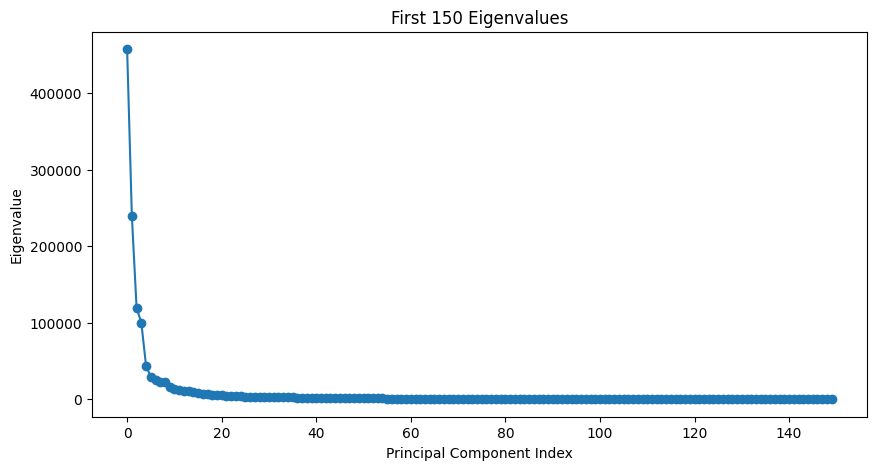

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(eigenvalues, marker='o', linestyle='-')
plt.title('First 150 Eigenvalues')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()



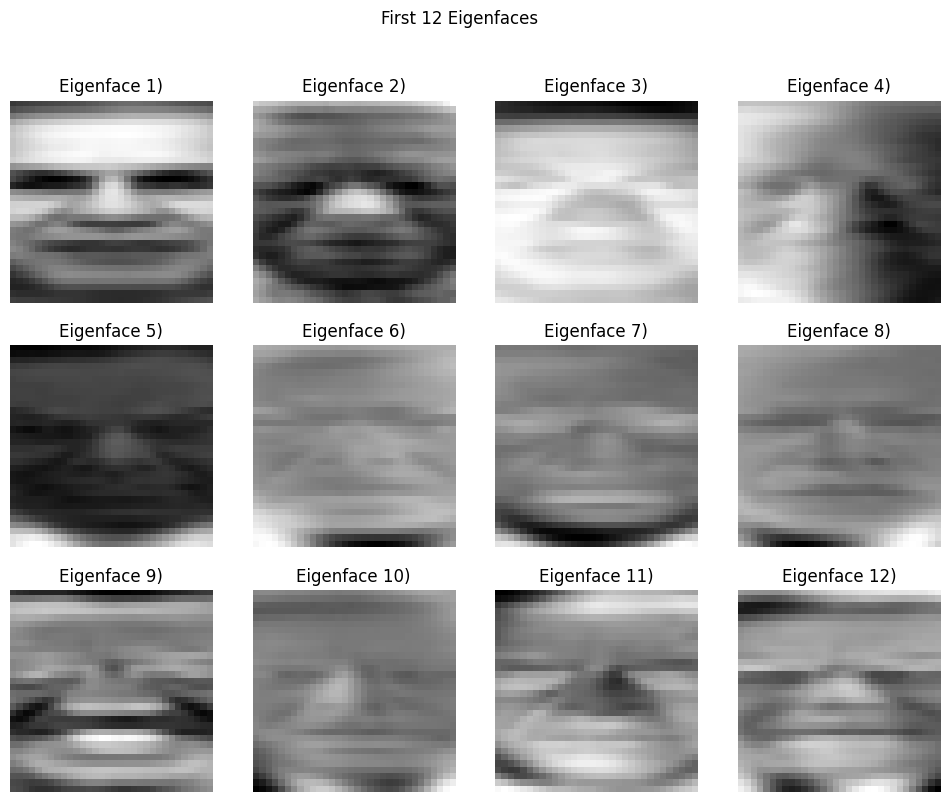

In [78]:
num_eigenfaces = 12
eigenfaces = Q[:, :num_eigenfaces]

# reshape to 32x32 images (from flattened vectors)
eigenface_images = [eigenfaces[:, i].reshape(32, 32) for i in range(num_eigenfaces)]

# Plot
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle("First 12 Eigenfaces")

for i, ax in enumerate(axes.flat):
    ax.imshow(eigenface_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Eigenface {i+1})")
plt.show()

## 2.4 Gesichtserkennung mit Eigengesichtern

Von den Testbildern wird nun ebenfalls der Mittelwert der Trainingsdaten abgezogen (s. Schritt 1 im PCA-Algorithmus). Projizieren Sie jedes der Trainings- und Testbilder auf die ersten 7 Eigengesichter, d.h. Sie erhalten so für jedes Trainings- und Testbild 7 Merkmale. Die Gesichtserkennung geschieht nun dadurch, dass Sie den euklidischen Abstand des Testbildes in diesem 7-dimensionalen Merkmalsraum zu allen Trainingsbildern berechnen. Die Person des am nächsten liegenden Trainingsbildes (d.h. mit dem minimalen euklidischen Abstand) ist dann (vermutlich) auch die korrekte Person für das Testbild (Nächster-Nachbar-Klassifikator). Welche Bilder werden korrekt klassifiziert, welche Verwechslungen gibt es?

In [74]:
# 7 Komponenten
num_components = 7
principal_components = Q[:, :num_components]

# Daten zentrieren durch Abzug von Mittelwert
X_train_centered = X_train - np.mean(X_train, axis=0)
X_test_centered = X_test - np.mean(X_train, axis=0)

# Projektion der Daten auf die 7 Komponenten
X_train_projected = X_train_centered @ principal_components
X_test_projected = X_test_centered @ principal_components

predicted_labels = []
correctly_classified = []
misclassified = []

# Nearest Neighbor Classification
for i, test_vector in enumerate(X_test_projected):

    # Euklidische Distanz berechnen
    distances = np.linalg.norm(X_train_projected - test_vector, axis=1)

    # Index des nächsten Nachbarn
    closest_index = np.argmin(distances)

    predicted_label = train_labels[closest_index]
    predicted_labels.append(predicted_label)

    # Evaluierung
    if predicted_label == test_labels[i]:
        correctly_classified.append(i)
    else:
        misclassified.append((i, predicted_label, test_labels[i]))

print("Correctly classified images:", correctly_classified)
print("Misclassifications (test index, predicted label, actual label):", misclassified)

accuracy = len(correctly_classified) / len(test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Correctly classified images: [0, 5]
Misclassifications (test index, predicted label, actual label): [(1, 'Tony_Blair', 'Colin_Powell'), (2, 'Colin_Powell', 'Donald_Rumsfeld'), (3, 'Tony_Blair', 'George_W_Bush'), (4, 'George_W_Bush', 'Gerhard_Schroeder'), (6, 'Gerhard_Schroeder', 'Tony_Blair')]
Accuracy: 28.57%
